# Predicting customer satisfaction

Attributes X1 to X6 indicate the responses for each question and have values from 1 to 5 where the smaller number indicates less and the higher number indicates more towards the answer.

* X1 = my order was delivered on time
* X2 = contents of my order was as I expected
* X3 = I ordered everything I wanted to order
* X4 = I paid a good price for my order
* X5 = I am satisfied with my courier
* X6 = the app makes ordering easy for me
* Y = target attribute (Y) with values indicating 0 (unhappy) and 1 (happy) customers


In [1]:
import sys, os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import plot_tree
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import precision_recall_curve
warnings.filterwarnings('ignore')

In [2]:
def plot_confusion_matrix(y_test, y_pred):
    """
    
    This function plots a confusion matrix given a set of true labels and predicted labels.

    Parameters
    ----------
    y_test : array-like
        The true labels.
    y_pred : array-like
        The predicted labels.

    """
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

def plot_feature_importance(model, X):
    """
    
    This function plots the feature importance of a model.

    Parameters
    ----------
    model : object
        The model to be used.
    X : array-like
        The features.

    """
    importance = pd.DataFrame({'feature': X.columns, 'importance': model.feature_importances_})
    importance = importance.sort_values('importance', ascending=False)
    sns.barplot(x='importance', y='feature', data=importance)
    plt.show()

def plot_roc_curve(y_test, y_pred):
    """
    
    This function plots a ROC curve given a set of true labels and predicted labels.

    Parameters
    ----------
    y_test : array-like
        The true labels.
    y_pred : array-like
        The predicted labels.

    """
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(fpr, tpr)

    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color='darkorange',
                lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()

def plot_precision_recall_curve(y_test, y_pred):
    """
    
    This function plots a precision-recall curve given a set of true labels and predicted labels.

    Parameters
    ----------
    y_test : array-like
        The true labels.
    y_pred : array-like
        The predicted labels.
        
    """
    precision, recall, thresholds = precision_recall_curve(y_test, y_pred)

    plt.figure()
    lw = 2
    plt.plot(recall, precision, color='darkorange',
                lw=lw, label='Precision-Recall curve')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall curve')
    plt.legend(loc="lower right")
    plt.show()

In [3]:
# read data from ./data/raw folder
#df = pd.read_csv(os.path.join(os.getcwd(), os.pardir, 'data', 'raw', 'ACME-HappinessSurvey2020.csv'))
df = pd.read_csv(os.path.abspath(os.path.join(os.getcwd(), '..', 'data', 'raw', 'ACME-HappinessSurvey2020.csv')))

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126 entries, 0 to 125
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Y       126 non-null    int64
 1   X1      126 non-null    int64
 2   X2      126 non-null    int64
 3   X3      126 non-null    int64
 4   X4      126 non-null    int64
 5   X5      126 non-null    int64
 6   X6      126 non-null    int64
dtypes: int64(7)
memory usage: 7.0 KB


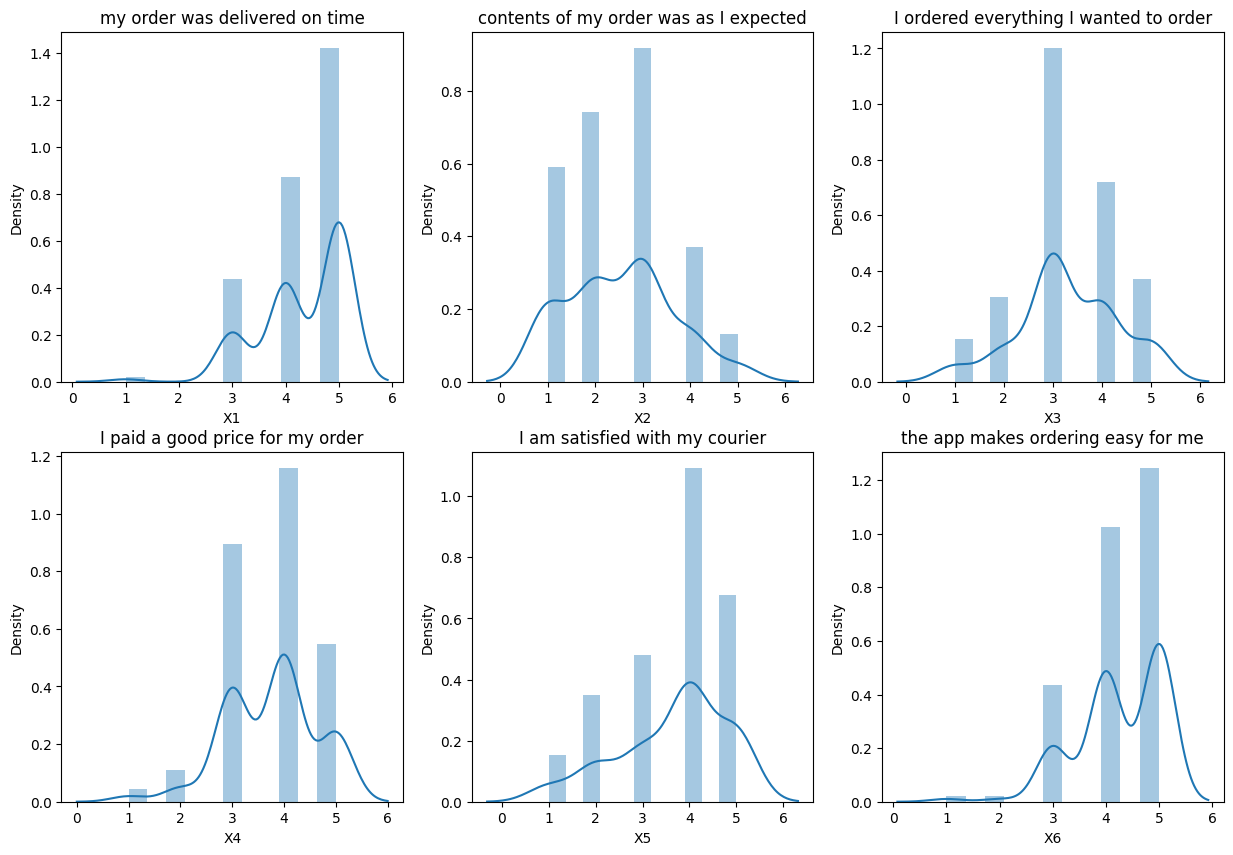

In [5]:
# Distribution of answers
fig, axs = plt.subplots(2, 3, figsize=(15, 10))
sns.distplot(df['X1'], ax=axs[0, 0])
axs[0, 0].set_title('my order was delivered on time')
sns.distplot(df['X2'], ax=axs[0, 1])
axs[0, 1].set_title('contents of my order was as I expected')
sns.distplot(df['X3'], ax=axs[0, 2])
axs[0, 2].set_title('I ordered everything I wanted to order')
sns.distplot(df['X4'], ax=axs[1, 0])
axs[1, 0].set_title('I paid a good price for my order')
sns.distplot(df['X5'], ax=axs[1, 1])
axs[1, 1].set_title('I am satisfied with my courier')
sns.distplot(df['X6'], ax=axs[1, 2])
axs[1, 2].set_title('the app makes ordering easy for me')
plt.show()

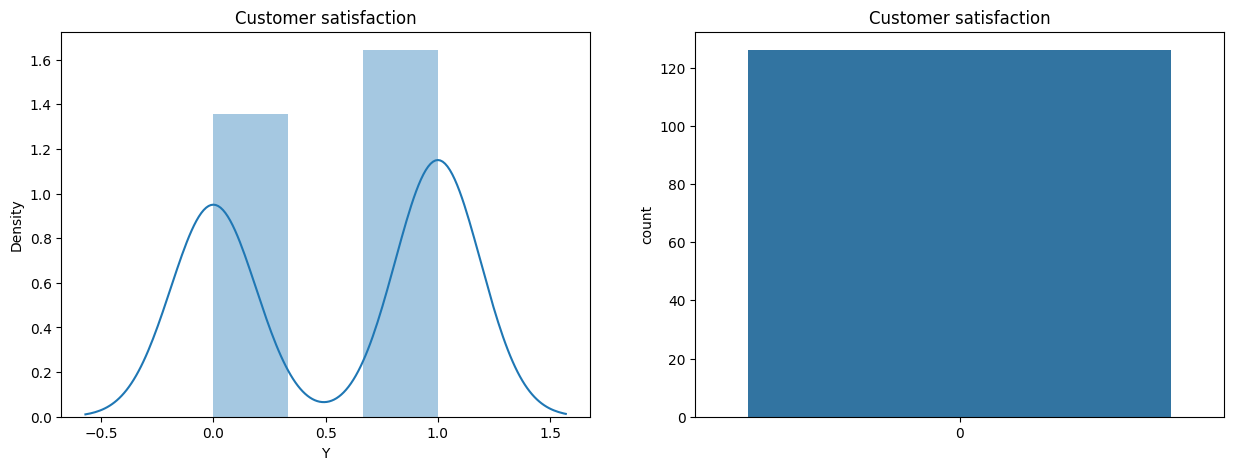

In [6]:
# Customer satisfaction
fig, axs = plt.subplots(1, 2, figsize=(15, 5))
sns.distplot(df['Y'], ax=axs[0])
axs[0].set_title('Customer satisfaction')
sns.countplot(df['Y'], ax=axs[1])
axs[1].set_title('Customer satisfaction')
plt.show()

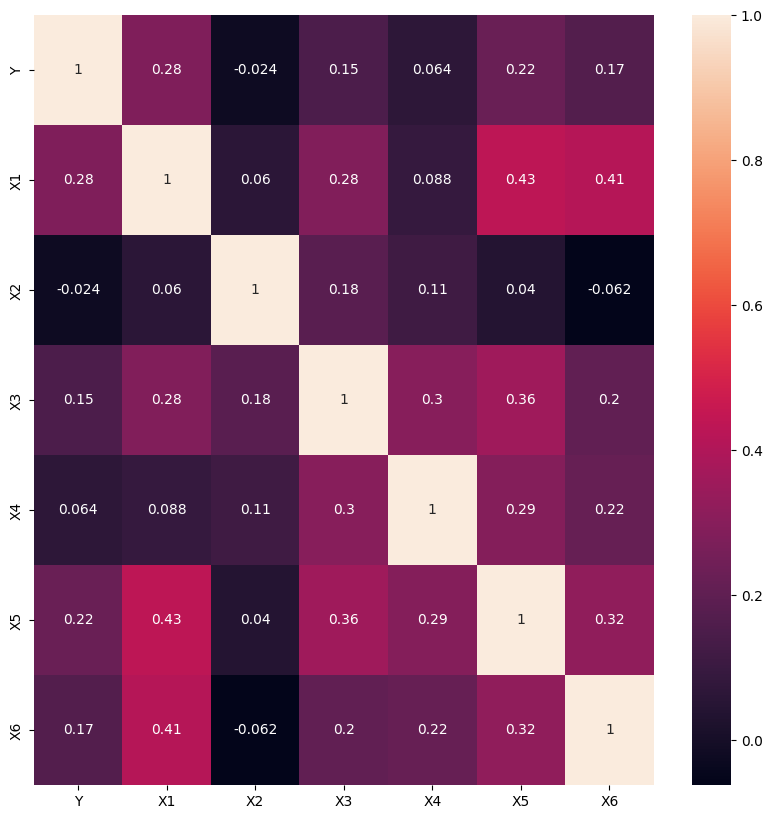

In [7]:
# Correlation matrix
corr = df.corr()
fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(corr, annot=True, ax=ax)
plt.show()

## Initial prediction with DecisionTree

In [8]:
# Build a decision tree that predicts Y based on X1, X2, X3, X4, X5, X6
y = df['Y']
X = df.drop(['Y'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print('Accuracy: ', accuracy_score(y_test, y_pred))

Accuracy:  0.6153846153846154


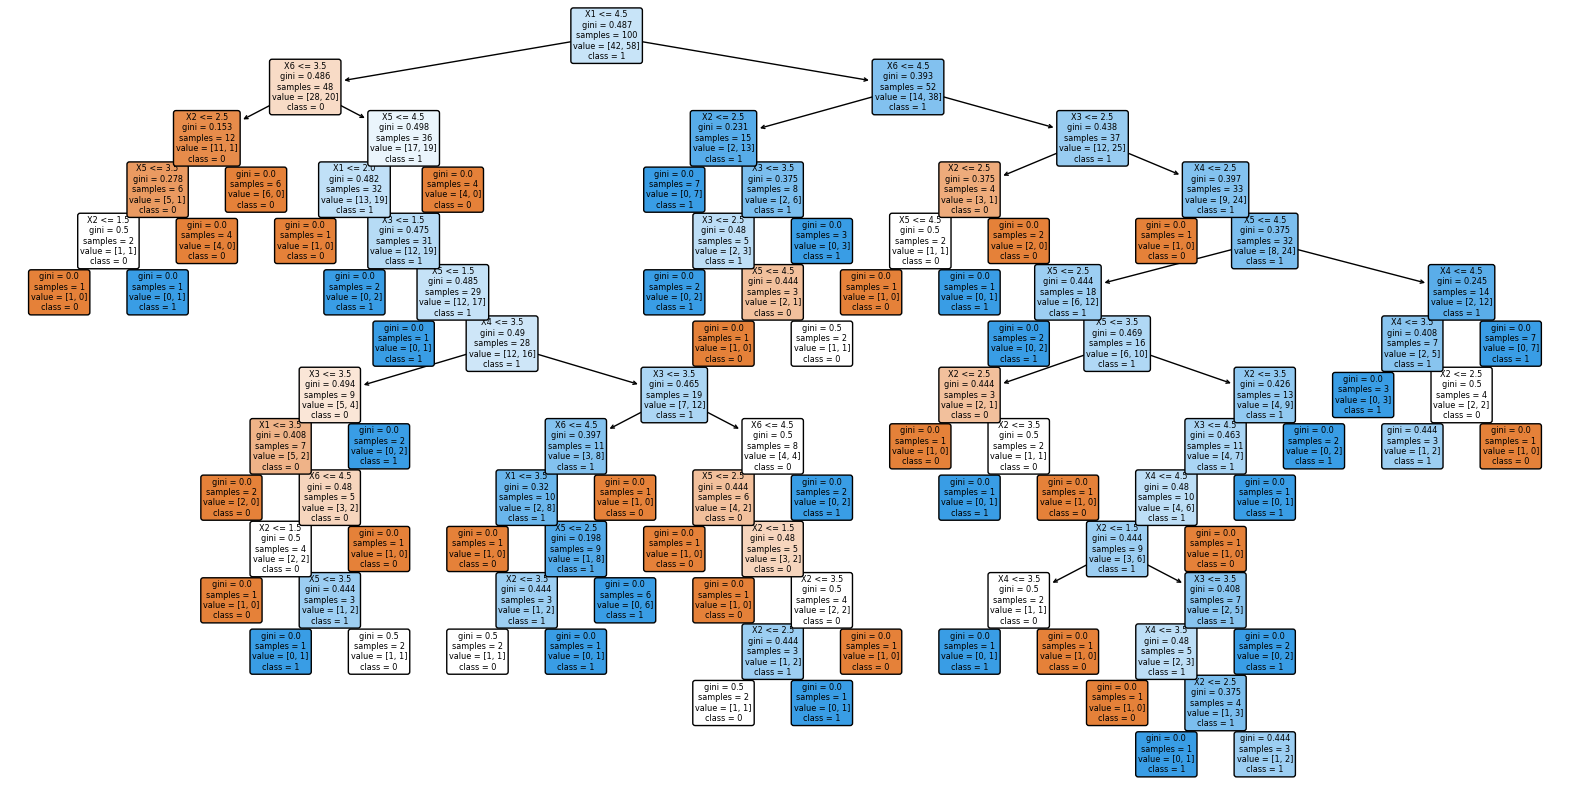

In [9]:
# Plot the decision tree
plt.figure(figsize=(20, 10))
plot_tree(clf, filled=True, rounded=True, feature_names=X.columns, class_names=['0', '1'])
plt.show()

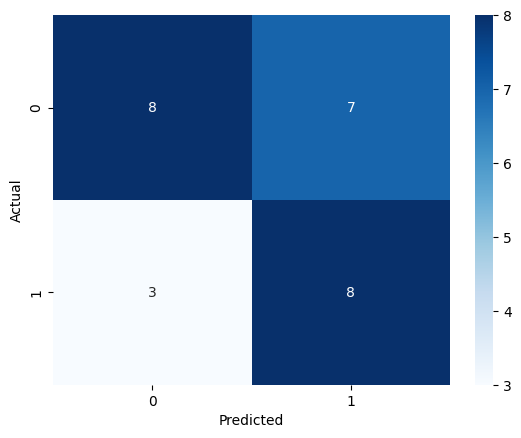

In [10]:
# Plot the confusion matrix'
plot_confusion_matrix(y_test, y_pred)

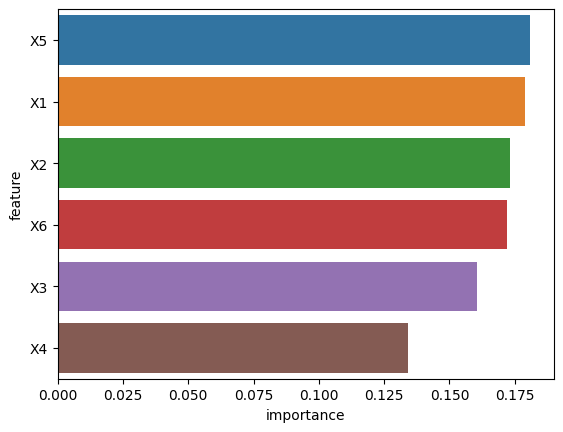

In [11]:
# Plot the feature importance
plot_feature_importance(clf, X)

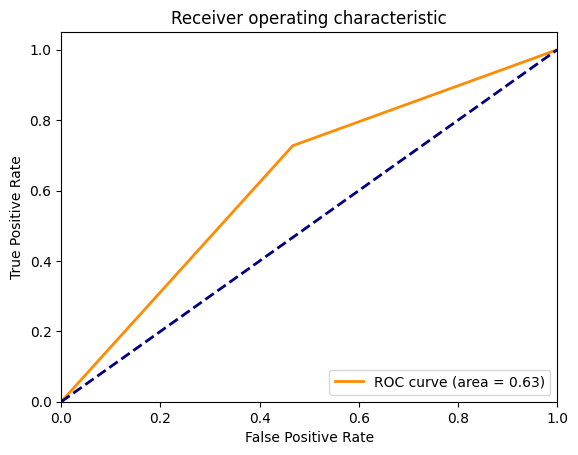

In [12]:
# Plot the ROC curve
plot_roc_curve(y_test, y_pred)


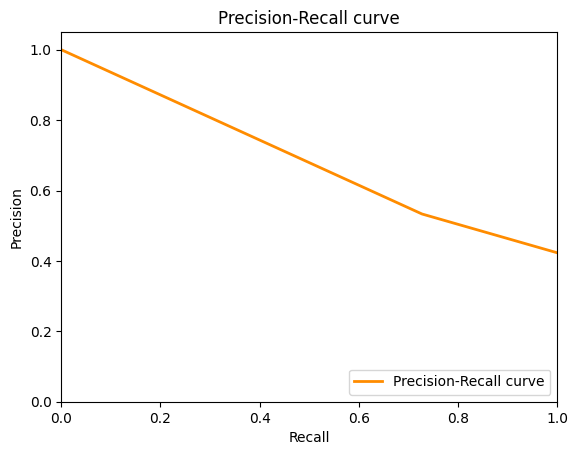

In [13]:
# Plot the precision-recall curve
plot_precision_recall_curve(y_test, y_pred)


## Prediction using XGboost

In [14]:
# use xgboost now
import xgboost as xgb
from xgboost import plot_importance

# Build a decision tree that predicts Y based on X1, X2, X3, X4, X5, X6
y = df['Y']
X = df.drop(['Y'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

xgb_clf = xgb.XGBClassifier(random_state=42)
xgb_clf.fit(X_train, y_train)

y_pred = xgb_clf.predict(X_test)

print('Accuracy: ', accuracy_score(y_test, y_pred))


Accuracy:  0.6538461538461539


### Identifying key parameters

In [15]:
import itertools
import xgboost as xgb
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Define the features to experiment with
features = ['X1', 'X2', 'X3', 'X4', 'X5', 'X6']

# Get all possible combinations of features
feature_combinations = []
for i in range(len(features)):
    feature_combinations += list(itertools.combinations(features, i+1))



# Split the data into training and testing sets
y = df['Y']
X = df.drop(['Y'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train and test the model using different feature combinations
for feature_set in feature_combinations:
    # Get the features to use
    X_train_subset = X_train[list(feature_set)]
    X_test_subset = X_test[list(feature_set)]
    
    # Train the model
    xgb_clf = xgb.XGBClassifier(random_state=42)
    xgb_clf.fit(X_train_subset, y_train)

    # Test the model
    y_pred = xgb_clf.predict(X_test_subset)
    accuracy = accuracy_score(y_test, y_pred)

    # Print the results
    if accuracy > 0.73:
        print('Features: {}, Accuracy: {}'.format(feature_set, accuracy))


Features: ('X1', 'X5'), Accuracy: 0.7307692307692307
Features: ('X1', 'X2', 'X5'), Accuracy: 0.7692307692307693
Features: ('X1', 'X2', 'X4', 'X5'), Accuracy: 0.7692307692307693


In [16]:
# Set up X and y
y = df['Y']
X = df[['X1', 'X2', 'X5']]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
xgb_clf = xgb.XGBClassifier(random_state=42)
xgb_clf.fit(X_train, y_train)

# Test the model
y_pred = xgb_clf.predict(X_test)

# Print the results
print('Accuracy: ', accuracy_score(y_test, y_pred))

Accuracy:  0.7692307692307693


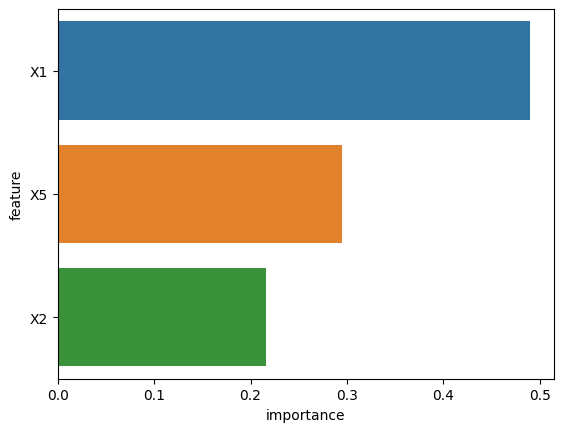

In [17]:
# Plot the feature importance
plot_feature_importance(xgb_clf, X)

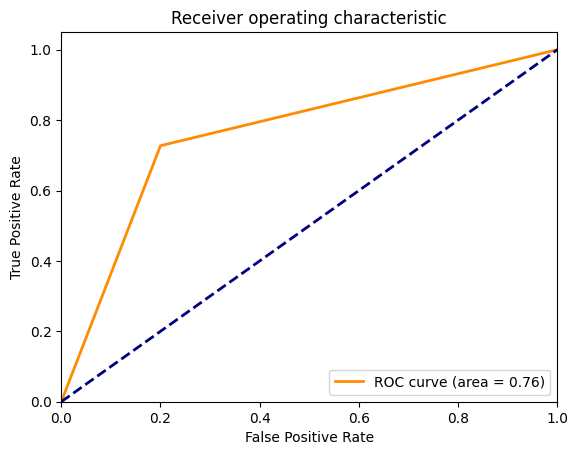

In [18]:
# Plot the ROC curve
plot_roc_curve(y_test, y_pred)

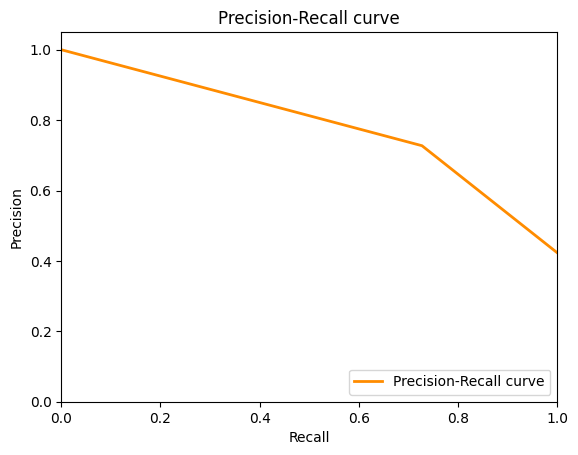

In [19]:
# Plot the precision-recall curve
plot_precision_recall_curve(y_test, y_pred)

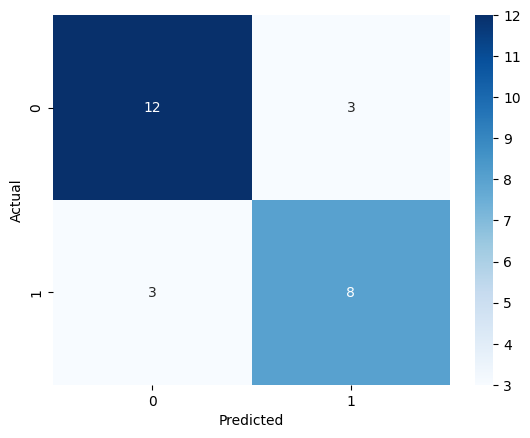

In [20]:
# Plot the confusion matrix
plot_confusion_matrix(y_test, y_pred)

## Conclusion

The following parameters seemed to have the most impact predicting customer satisfaction

* X1 = my order was delivered on time
* X2 = contents of my order was as I expected
* X5 = I am satisfied with my courier

Adding the following parameter does not improve performance

* X4 = I paid a good price for my order

Adding the following parameters decreased performance

* X3 = I ordered everything I wanted to order
* X6 = the app makes ordering easy for me
